# **Problem Statement**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

:::## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

## Approach taken:
This project is divided into multiple section where each section will have it's own importance towards our problem statements. the approach that we will be following in this project is given as-

Section 1: In this section we will simply loading our dataset into google colab and will explore the basic information about data.

Section 2: In section 2 we will be dealing with missing values of this dataset and will impute the values into missing places.

Section 3: In this section We fill focus on Exploratory data analysis of the dataset using various methods and visualization plot and will be extracting the information from this dataset as much as we can.

Section 4: In this section we will be dealing with outliers in out dataset and will see how to define our outlier criteria and deal with outliers.

Section 5: In this Section we will be applying NLP in order to get most similer contents like most similer movies.

Section 6: In this section we will be perform various clustering methods to find out best no. of clusters and for validation we will be using Silhouette score and elbow curve where ever it is applicable.

Section 7: In this section we will be giving a quick summary of entire notebook.




## Section 1: Loading and reading Dataset

# Installing Packages to be used 

In [2]:
!pip install kmodes
! pip install umap-learn
! pip install prince

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 88 kB 3.6 MB/s 
     |████████████████████████████████| 1.1 MB 32.5 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=7e242e69a15773ec4244cc9defe854356cc2c15ef05e232f9a242560179052e4
  Stored in directory: /root/.cache/pip/wheels/b3/52/a5/1fd9e3e76a7ab34f134c07469cd6f16e27ef3a37aeff1fe821
  Created wheel for pynndescent: filename=pynndescent-0.5.7-py3-none-any.whl size=54286 sha256=69fdad616408f74deab46474ecef428a5130ec06753e2ae0c9c85268a1a1604a
  Stored in directory: /root/.cache/pip/wheels/7f/2a/f8/7bd5dcec71bd5c669f6f574db3113513696b98f3f9b51f496c
Successfully built umap-learn pynndescent
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# importing all important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from kmodes.kmodes import KModes
from sklearn.cluster import KMeans

from sklearn.feature_extraction.text import TfidfVectorizer
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.preprocessing import StandardScaler,normalize


import umap.umap_ as umap

In [4]:
# mounting drive 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# Reading the dataset
initial_df =  pd.read_csv('/content/drive/MyDrive/NETFLIX MOVIES AND TV SHOWS  CLUSTERING/NETFLIX MOVIES AND TV SHOWS CLUSTERING (1).csv')

In [6]:
# Making a copy of this dataset
df = initial_df.copy()

In [7]:
# Looking at the head of the data set
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [8]:
# Looking at the tail of the dataset
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [9]:
# basic info about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [10]:
# describing the dataset by transposing columns
df.describe(include = ['category', 'object']).transpose()

,count,unique,top,freq
show_id,7787,7787,s1,1
type,7787,2,Movie,5377
title,7787,7787,3%,1
director,5398,4049,"Raúl Campos, Jan Suter",18
cast,7069,6831,David Attenborough,18
country,7280,681,United States,2555
date_added,7777,1565,"January 1, 2020",118
rating,7780,14,TV-MA,2863
duration,7787,216,1 Season,1608
listed_in,7787,492,Documentaries,334


In [11]:
# checking for unique features in each column
pd.DataFrame(df.nunique())


,0
show_id,7787
type,2
title,7787
director,4049
cast,6831
country,681
date_added,1565
release_year,73
rating,14
duration,216


In [12]:
# checking for duplicate entries
df.duplicated().sum()

0

In [13]:
# Droping the show_id column
df = df.drop(['show_id'], axis =1)

## Summary: Section 1



*   We have seen that we are given 7787 rows and 12 columns and most columns are categorical.
*   We are given two different content type as movies and tv shows hence we will be dealing with these columns separately in other sections.
*   We also have observed that some columns are nested columns where values are given comma( , ) separable. Since these columns are cast and listed_in(genres) and these two features play very important part in movies and tv shows hence we will be treating them carefully.
*   There is no duplicated datapoint/row in our dataset.
*   Since we have mostly categorical features hence we do not get too much descriptive statistical values apart from mode of the features.
*   We also have checked unique values of all the features.
*   We also have dropped show_id columns as all the values of this columns are unique and will not be relevant for our investigation and objective.



##Section 2: Missing value treatment

In [14]:
# checking missing values
df.isnull().sum()

type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

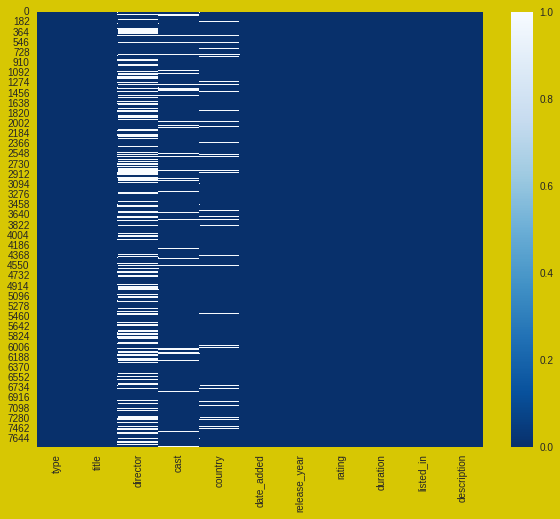

In [15]:
# Visualizing the distribution of  missing values in the dataset
plt.figure(figsize = (10,8), facecolor = 'y')
ax = plt.gca()
sns.heatmap(df.isnull(), cmap = 'Blues_r', ax =ax,  linecolor = 'r')
plt.show()

In [16]:
# filling the missing values in director, cast and country column
df['director'] =df.director.fillna('None')
df['cast'] =  df['cast'].fillna('not available')
df['country'] = df['country'].fillna('missing')

In [17]:
# checking for the missing values after imputing values in above columns
df.isnull().sum()

type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           7
duration         0
listed_in        0
description      0
dtype: int64

In [18]:
# dropping date_added and rating rows where values are missing
df = df.dropna(axis =0, subset = ['date_added', 'rating'] )
df['date_added'].isnull().sum()


0

In [19]:
# checking the null values after removal
df.isnull().sum()

type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

## Summary: Section 2


*   Firstly we have summarized the missing values in entire dataset and found that the most missing values are available in director feature followed by  cast  and country. and the features which has minimum values are date_added and rating. 
*   Then we have visualized the missing values across the data by plotting heatmap and seen that values are missing completely at random.
*   since the columns which were containing missing values were quite important hence we didn't drop those missing values as it could have lead to information shortage and finally we have decided to fill these missing values by some dummy value except date_added feature and rating as these columns are having less missing values 10, 7 respectively and hence we have dropped the rows containg these null values.



## Section 3: Exploratory data analysis

In [20]:
# defining a function to get the year addedfrom the date_added
def func_1(x):
  return x.split()[0]

In [21]:
# Getting the year added column by applying above function
df['month_added'] = df['date_added'].apply(func_1)
df['year_added']  = df['date_added'].apply(lambda x : x.split()[-1])
df['release_year']  = df['release_year'].astype(str)
df = df.drop('date_added', axis =1)

In [22]:
# checking the head of the dataset
df.head()

,type,title,director,cast,country,release_year,rating,duration,listed_in,description,month_added,year_added
0,TV Show,3%,None,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,August,2020
1,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,December,2016
2,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",December,2018
3,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",November,2017
4,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,January,2020


In [23]:
# defining two sub-datasets based on type of the content
shows_df = df[df['type'] == 'TV Show']
movie_df  = df[df['type']== 'Movie']


In [24]:
# creating a column n movie_df dataframe using func_1 funtion
movie_df['duration'] = movie_df['duration'].apply(func_1)

In [25]:
# head of movie_data
movie_df.head()

,type,title,director,cast,country,release_year,rating,duration,listed_in,description,month_added,year_added
1,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,December,2016
2,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",December,2018
3,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",November,2017
4,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,PG-13,123,Dramas,A brilliant group of students become card-coun...,January,2020
6,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,2019,TV-MA,95,"Horror Movies, International Movies","After an awful accident, a couple admitted to ...",June,2020


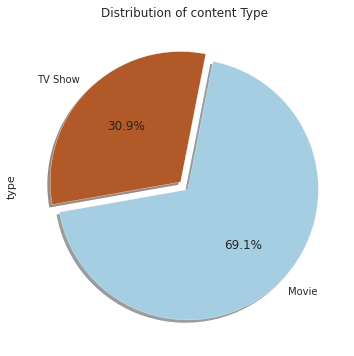

In [26]:
# plotting the type distribution
sns.set_style('darkgrid')


plt.figure(figsize = (8,6))
df['type'].value_counts().plot.pie(autopct="%1.1f%%", cmap = 'Paired', shadow=True, startangle=190,explode=(0.04,0.04));
plt.title('Distribution of content Type')
plt.show()


In [27]:
# getting top 15 countries based on content type


# creating a  TV shows dataset where imputed values are not taking into account
tv_shows_df = df[df['type'] == 'TV Show']
tv_shows_df = tv_shows_df[tv_shows_df['country'] != 'missing']

# creating a  movies dataset where imputed values are not taking into account
movies_df  = df[df['type']== 'Movie']
movies_df = movies_df[movies_df['country'] != 'missing']


# getting unique values shows dataframe
country_df_shows = pd.DataFrame(tv_shows_df['country'].str.split(', ', expand= True).stack().reset_index(level =1, drop = True).value_counts()).reset_index()
country_df_shows.rename(columns = {'index': 'country', 0:'shows counts'}, inplace =True)
top_15_countries = country_df_shows.head(15)

# getting unique values shows dataframe for movies
country_df_movies = pd.DataFrame(movies_df['country'].str.split(', ', expand= True).stack().reset_index(level =1, drop = True).value_counts()).reset_index()
country_df_movies.rename(columns = {'index': 'country', 0:'movies counts'}, inplace =True)
top_15_countries_movies = country_df_movies.head(15)
new_df = pd.concat([top_15_countries, top_15_countries_movies] , axis =1)

# final dataframe
new_df





,country,shows counts,country,movies counts
0,United States,860,United States,2427
1,United Kingdom,255,India,915
2,Japan,182,United Kingdom,466
3,South Korea,157,Canada,286
4,Canada,126,France,265
5,France,84,Spain,158
6,India,75,Germany,157
7,Taiwan,70,Japan,103
8,Australia,58,China,102
9,Spain,57,Mexico,101


In [28]:
# top 10 directors who have directed most movies
director_df  =  df[df['director'] != 'None']
director_df = pd.DataFrame(director_df['director'].value_counts().head(10)).reset_index()
director_df.rename(columns = {'index' : 'director', 'director' : 'counts'}, inplace= True)
director_df



,director,counts
0,"Raúl Campos, Jan Suter",18
1,Marcus Raboy,16
2,Jay Karas,14
3,Cathy Garcia-Molina,13
4,Jay Chapman,12
5,Youssef Chahine,12
6,Martin Scorsese,12
7,Steven Spielberg,10
8,David Dhawan,9
9,Hakan Algül,8


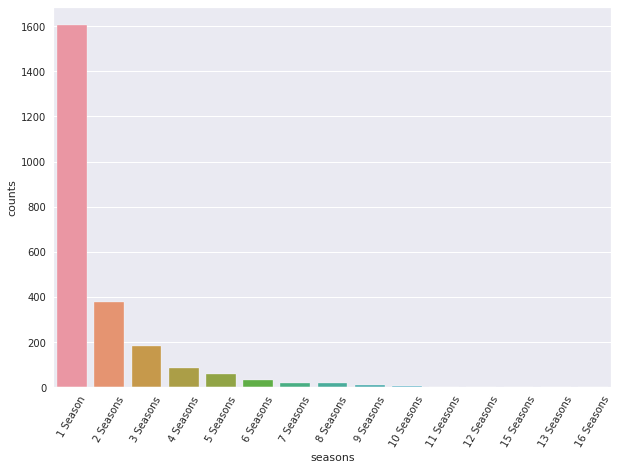

,seasons,counts
0,1 Season,1606
1,2 Seasons,378
2,3 Seasons,183
3,4 Seasons,86
4,5 Seasons,57
5,6 Seasons,30
6,7 Seasons,19
7,8 Seasons,18
8,9 Seasons,8
9,10 Seasons,5


In [29]:
# plotting seasons distribution for TV shows

plt.figure(figsize = (10,7))


seasons_df = pd.DataFrame(shows_df['duration'].value_counts()).reset_index()
seasons_df.rename(columns = {'index': 'seasons', 'duration': 'counts'}, inplace = True)
sns.barplot(data =seasons_df, x= 'seasons', y= 'counts')
plt.xticks(rotation = 60)
plt.show()


seasons_df

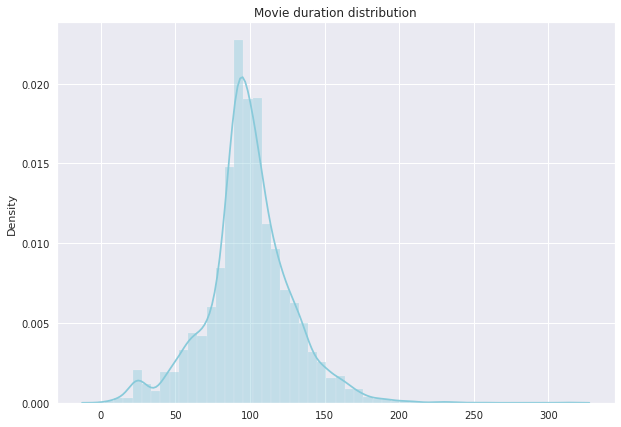

In [30]:
plt.figure(figsize = (10,7))
ax = plt.gca()
sns.distplot( x= movie_df['duration'], ax = ax, color = 'c')
plt.title('Movie duration distribution')
plt.show()


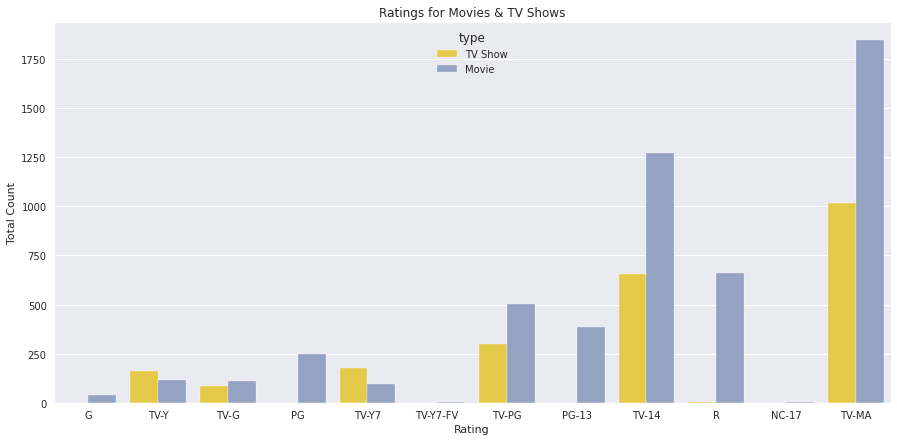

In [31]:
# visualizing the distribution of various ratings
order =  ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']
plt.figure(figsize=(15,7))
g = sns.countplot(df.rating, hue=df.type, order=order, palette='Set2_r');
plt.title("Ratings for Movies & TV Shows")
plt.xlabel("Rating")
plt.ylabel("Total Count")
plt.show()

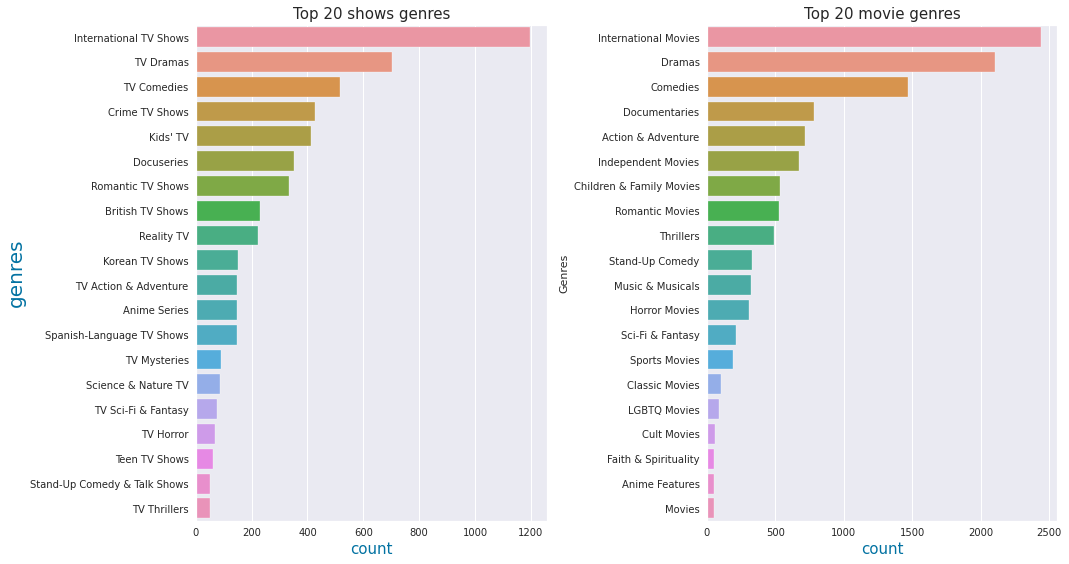

In [32]:
# finding top 20 movie genres in movies and TV shows
genres_shows = shows_df.listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
genres_movies = movie_df.listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)


fig , axes = plt.subplots(1,2, figsize = (15,8))

sns.countplot(y = genres_shows, order=genres_shows.value_counts().index[:20], ax= axes[0])
sns.countplot(y = genres_movies, order=genres_movies.value_counts().index[:20], ax= axes[1])

axes[0].set_xlabel('count', fontsize = 15, c='b')
axes[1].set_xlabel('count', fontsize = 15, c='b')
axes[0].set_ylabel('genres', fontsize = 20, c = 'b')
axes[0].set_title('Top 20 shows genres', fontsize = 15)
axes[1].set_title('Top 20 movie genres', fontsize = 15 )




# plt.figure(figsize=(7,9))
# g = sns.countplot(y = genres_shows, order=genres_shows.value_counts().index[:20])

# plt.xlabel('Titles')
plt.ylabel('Genres')
plt.tight_layout()
plt.show()

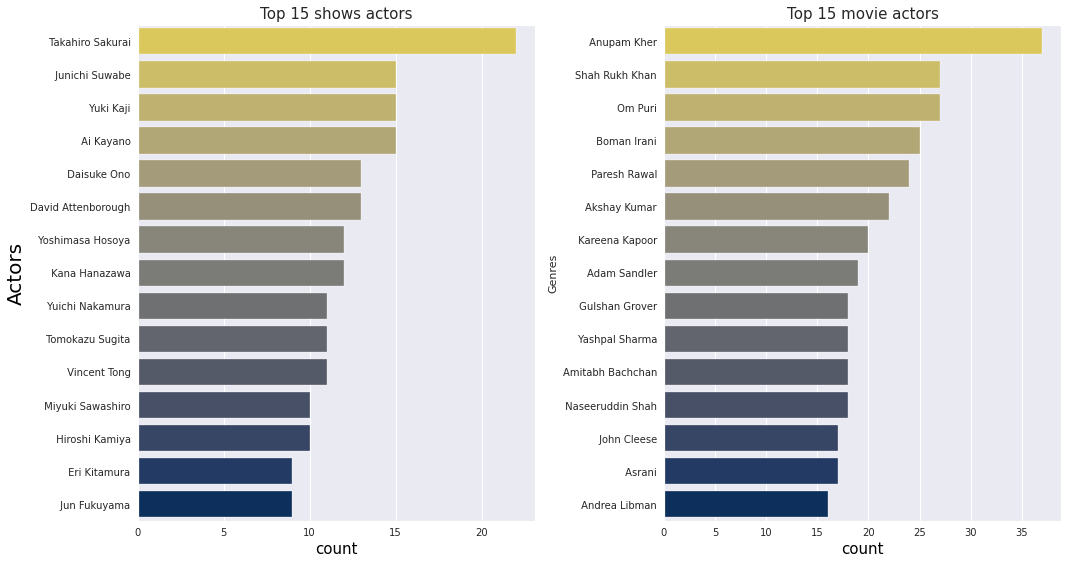

In [33]:
# finding the top actors who have worked in most content in movies and TV shows
tv_shows_df = df[df['type'] == 'TV Show']
tv_shows_actors = tv_shows_df[tv_shows_df['cast'] != 'not available']

movies_df  = df[df['type']== 'Movie']
movie_actors = movies_df[movies_df['cast'] != 'not available']




top_shows_actors =  tv_shows_actors.cast.str.split(',', expand= True).stack().reset_index(level =1, drop = True)
top_movie_actors =  movie_actors.cast.str.split(',', expand= True).stack().reset_index(level =1, drop = True)



fig , axes = plt.subplots(1,2, figsize = (15,8))

sns.countplot(y = top_shows_actors, order=top_shows_actors.value_counts().index[:15], ax= axes[0], palette ='cividis_r')
sns.countplot(y = top_movie_actors, order=top_movie_actors.value_counts().index[:15], ax= axes[1], palette = 'cividis_r')

axes[0].set_xlabel('count', fontsize = 15, c='black')
axes[1].set_xlabel('count', fontsize = 15, c='black')
axes[0].set_ylabel('Actors', fontsize = 20, c = 'black')
axes[0].set_title('Top 15 shows actors', fontsize = 15)
axes[1].set_title('Top 15 movie actors', fontsize = 15 )

plt.ylabel('Genres')
plt.tight_layout()
plt.show()

<Figure size 864x504 with 0 Axes>

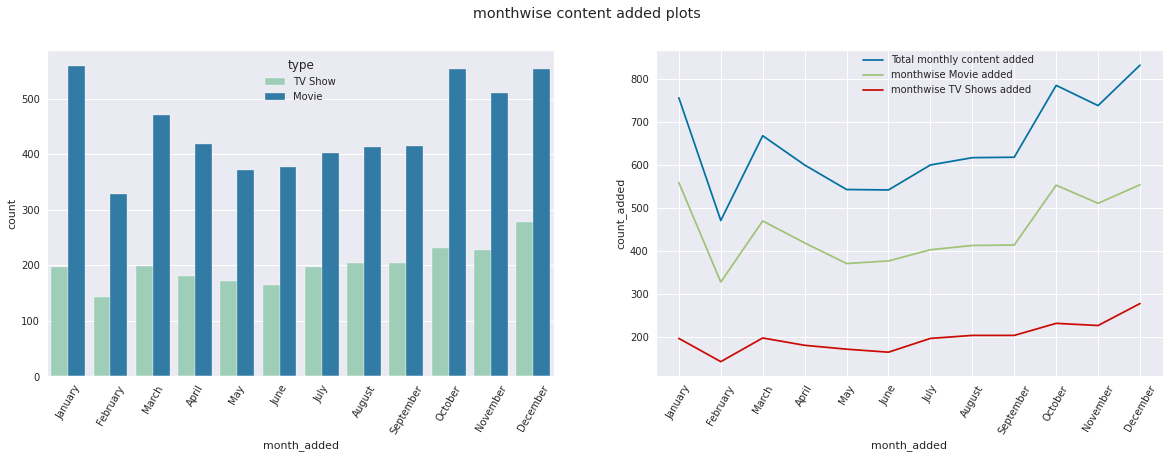

December     832
October      785
January      756
November     738
March        668
September    618
August       617
July         600
April        600
May          543
June         542
February     471
Name: month_added, dtype: int64

In [34]:
# month wise content distribution
month_list = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September','October', 'November', 'December']



# month wise content distribution in entire dataset
month_added_df = pd.DataFrame(df['month_added'].value_counts()).reset_index().sort_values('index')
month_added_df.rename(columns = {'index' : 'month_added', 'month_added': 'count_added'}, inplace = True)
month_added_df["month_added"]  = pd.Categorical(month_added_df["month_added"], categories=month_list)

# month wise content distribution in movies dataset
movies_added_month =  pd.DataFrame(movie_df['month_added'].value_counts()).reset_index().sort_values('index')
movies_added_month.rename(columns = {'index' : 'month_added', 'month_added': 'count_added'}, inplace = True)
movies_added_month["month_added"]  = pd.Categorical(movies_added_month["month_added"], categories=month_list)

# month wise content distribution in TV shows dataset
shows_added_month =  pd.DataFrame(shows_df['month_added'].value_counts()).reset_index().sort_values('index')
shows_added_month.rename(columns = {'index' : 'month_added', 'month_added': 'count_added'}, inplace = True)
shows_added_month["month_added"]  = pd.Categorical(shows_added_month["month_added"], categories=month_list)



# plotting the results of movies and TV shows in  count plot
plt.figure(figsize = (12,7))
fig, axes =  plt.subplots(nrows = 1, ncols = 2, figsize = (20,6))
sns.countplot(data = df , x = 'month_added', order = month_list,  hue = 'type', palette = 'YlGnBu', ax = axes[0])
axes[0].set_xticklabels(labels =month_list, rotation = 60)



# plotting the distribution of entire content added in line plot
sns.lineplot(data= month_added_df, x='month_added',  y='count_added' , ax = axes[1])

# plotting the distribution of movie content added in line plot
sns.lineplot(data= movies_added_month, x='month_added',  y='count_added' , ax = axes[1])

# plotting the distribution of TV Show content added in line plot
sns.lineplot(data= shows_added_month, x='month_added',  y='count_added', ax = axes[1] )

plt.legend(['Total monthly content added','monthwise Movie added','monthwise TV Shows added'], loc = (0.4,0.85))
plt.xticks(rotation = 60)


plt.suptitle('monthwise content added plots')
plt.show()


df['month_added'].value_counts()

In [35]:
# year wise content distribution

# year wise content distribution in entire dataset
year_df = pd.DataFrame(df['year_added'].value_counts()).reset_index().sort_values('index')
year_df.rename(columns = {'index' : 'year_added', 'year_added': 'count_added'}, inplace = True)

# year wise content distribution in movies dataset
movies_added =  pd.DataFrame(movie_df['year_added'].value_counts()).reset_index().sort_values('index')
movies_added.rename(columns = {'index' : 'year_added', 'year_added': 'count_added'}, inplace = True)

# year wise content distribution in TV shows dataset
shows_added =  pd.DataFrame(shows_df['year_added'].value_counts()).reset_index().sort_values('index')
shows_added.rename(columns = {'index' : 'year_added', 'year_added': 'count_added'}, inplace = True)






<Figure size 864x720 with 0 Axes>

<Figure size 864x504 with 0 Axes>

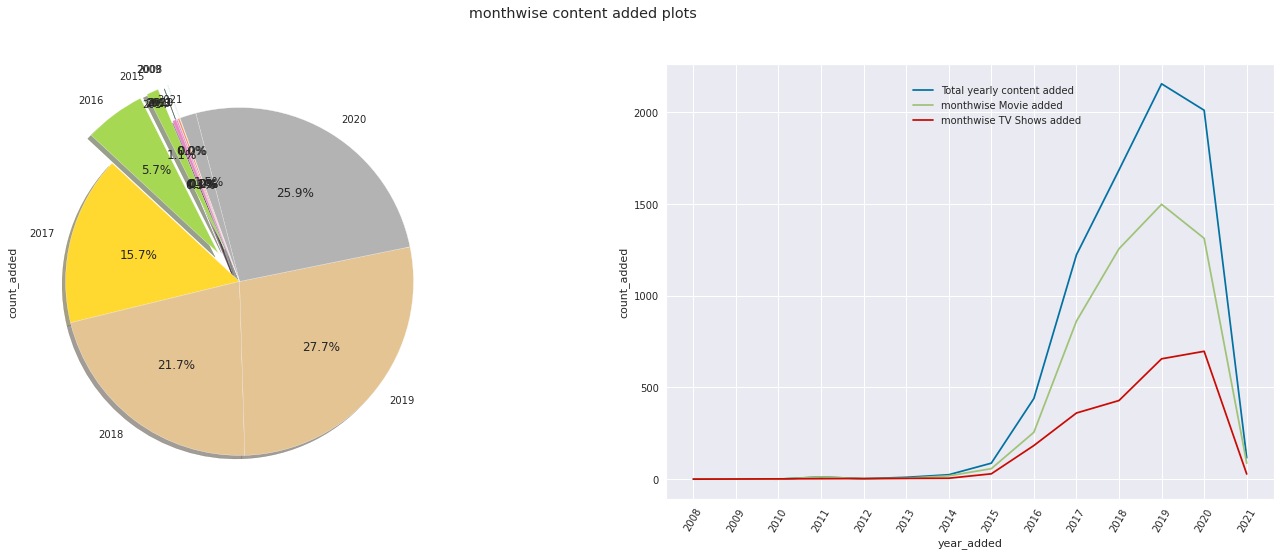

In [36]:
#plotting the results
plt.figure(figsize = (12,10))



# plotting pie plot for yearly content added by Netflix on the platform
year_list = range(2008,2022)
explode_list = (0.2,0.2,0,0,0,0,0, 0.2, 0.2,0,0,0,0,0)


plt.figure(figsize = (12,7))
fig, axes =  plt.subplots(nrows = 1, ncols = 2, figsize = (24,8))
year_df['count_added'].plot.pie(autopct="%1.1f%%", cmap = 'Set2', shadow=True, startangle=110, ax= axes[0], explode = explode_list,labels =year_list)
axes[0].set_xticklabels(labels =year_list, rotation = 60)



# plotting the distribution of entire content added in line plot
sns.lineplot(data= year_df, x='year_added',  y='count_added' , ax = axes[1])

# plotting the distribution of movie content added in line plot
sns.lineplot(data= movies_added, x='year_added',  y='count_added' , ax = axes[1])

# plotting the distribution of TV content added in line plot
sns.lineplot(data= shows_added, x='year_added',  y='count_added', ax = axes[1] )

plt.legend(['Total yearly content added','monthwise Movie added','monthwise TV Shows added'], loc = (0.4,0.85))
plt.xticks(rotation = 60)


plt.suptitle('monthwise content added plots')
plt.show()



## Summary: Section 3


*   As we all know that EDA is one of the most important part of any Data Science project and if not done properly it may lead to incorrect insight of historical data. Keeping this in mind we have performed a very detailed data analysis for this first we have divided our data set into two different datasets named movie_df which contains all the movies given in dataset and it's associated information. The other dataset that we have created contains the information about TV shows named shows_df. basis these two datasets we have performed EDA and found which type has which insigts in terms of given features.

*   In this path first we have changed nature of movie duration as it was given to in string format.

*   Then we have seen what type of content is available in what amount and ratio and found that 69% of dataset is occupied by movies and 31% is occupied by TV shows.
*   Then we have tabulate top 15 countries which has realeased most movies and TV shows and found that US is on top in both. In shows US is followed by UK and in movies US is followed by India.


*   Then we have seen top 10 directors who have directed most content for Netflix


*   Then we have seen the seasons distriution of TV shows and found that there are only few TV shows which crossed 8 season most of seasons have released in one 1 season.Also when plotted movies duration distribution then we have found that this distribution is positively skewed and there are very less moves which crossed 175 mins. Thus we information that we need to remove certain outliers from out dataset
*   We also have seen ratings distribution and found that most contents are adult rated on Netflix and there are very less G-rated contents.
*   Then we move forward and analyzed genres for movies and TV shows and figured out that in both type internation genres is on top in the list followed by drama and comedies respectively.
*   We also have actors who were part of most shows and movies which gave us that Takahiro sukurai has worked in most shows and Anupam kher has worked in most movies.
*   Then we have visualized that how the content is added on the platform in different month. With the help of monthwise analysis we have found that most content is added on the platform in the month of Oct, Nov, Dec, and Jan.
* Then we have seen what type of content and how much content is added on the platform on the basis of year. with this distribution we have found that in recent year content is added on the platform exponentially. also we have found that between 2019 to 2020 Netfilx has added more shows in comparison of movies. And Since the dataset is not given for complete 2021 hence we are not telling about it.  




## Section 4 : Outlier detection

depending on the nature of columns and values of these columns most of the columns content a lot unique values hence we cannot detect outliers however we check for the outliers in country and duration column if exist.

In [37]:
# checking for the outliers in countries column
df_a = pd.DataFrame(df['country'].value_counts())
df_a[df_a['country'] == 1]


# basis on this data we cannot find outlier rows in country column

,country
"South Africa, Angola",1
"United States, United Kingdom, Spain, South Korea",1
"Canada, Mexico, Germany, South Africa",1
"Hong Kong, Taiwan",1
"United Kingdom, United States, Canada",1
...,...
"Russia, United States, China",1
"Italy, Switzerland, France, Germany",1
"United States, United Kingdom, Canada",1
"United States, United Kingdom, Japan",1


### outliers in duration
since we have two content types (TV shows and movies ) and the values are different in both these types hence we will perform these tasks saperately in two individudal dataframes. i.e shows_df & movie_df

In [38]:
# detecting outlier detection in shows_df as in this dataframe duration columns contains categorical values i.e seasons

# cheking for the percent distribution in duraion column of shows_df


shows_df['duration'].value_counts(normalize =True)*100

shows_duration = pd.DataFrame(shows_df['duration'].value_counts()).reset_index().rename(columns = {'index' : 'season', 'duration': 'counts'})
shows_duration['percent_occupied'] = shows_duration['counts']/len(shows_df)*100
shows_duration
# based on this result we can assume that there are less than 1 percent shows which are 7 seasons or long hence we can consider these seasons as outliers
# however we will be removing content which has more than 10 seasons

,season,counts,percent_occupied
0,1 Season,1606,66.972477
1,2 Seasons,378,15.763136
2,3 Seasons,183,7.631359
3,4 Seasons,86,3.586322
4,5 Seasons,57,2.376981
5,6 Seasons,30,1.251043
6,7 Seasons,19,0.792327
7,8 Seasons,18,0.750626
8,9 Seasons,8,0.333611
9,10 Seasons,5,0.208507


In [39]:
# checking shape before outlier removal
shows_df.shape

(2398, 12)

In [40]:
# new shows_df after removing shows having more than 10 seasons
list_1 = ['11 Seasons', '12 Seasons', '15 Seasons', '13 Seasons','16 Seasons']

shows_df_updated = shows_df[shows_df['duration'] != '11 Seasons'  ]
shows_df_updated = shows_df_updated[shows_df_updated['duration'] != '12 Seasons'  ]
shows_df_updated = shows_df_updated[shows_df_updated['duration'] != '13 Seasons'  ]
shows_df_updated = shows_df_updated[shows_df_updated['duration'] != '14 Seasons'  ]
shows_df_updated = shows_df_updated[shows_df_updated['duration'] != '15 Seasons'  ]
shows_df_updated = shows_df_updated[shows_df_updated['duration'] != '16 Seasons'  ]
shows_df_updated['duration'].value_counts(normalize =True)*100

1 Season      67.196653
2 Seasons     15.815900
3 Seasons      7.656904
4 Seasons      3.598326
5 Seasons      2.384937
6 Seasons      1.255230
7 Seasons      0.794979
8 Seasons      0.753138
9 Seasons      0.334728
10 Seasons     0.209205
Name: duration, dtype: float64

In [ ]:
## checking shape after outlier removal
shows_df_updated.shape

outlier detection in duration column of  movie_df 

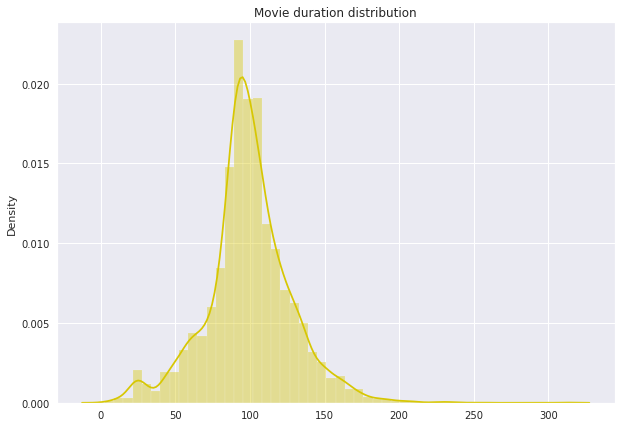

In [42]:
# we will be using isllation forest technique to detect outlier in duration column of movies_df

# first let see distribution of movies again 

plt.figure(figsize = (10,7))
ax = plt.gca()
sns.distplot( x= movie_df['duration'], ax = ax, color = 'y')
plt.title('Movie duration distribution')
plt.show()


In [43]:
# cheking shape of movie_df before oulier removal
movie_df.shape

(5372, 12)

### Using Isolation forest method to remove outliers from movie duration feature

In [44]:
# importing isolationForest
from sklearn.ensemble import IsolationForest


movie_df1 = movie_df.copy()

isolation_forest = IsolationForest(n_estimators = 100, contamination = 0.04, random_state = 42)
isolation_forest.fit(movie_df1['duration'].values.reshape(-1,1))
movie_df1['anomaly_score'] = isolation_forest.decision_function(movie_df1['duration'].values.reshape(-1,1))
movie_df1['-1 if outlier'] = isolation_forest.predict(movie_df1['duration'].values.reshape(-1,1))

# printing head of the dataset
movie_df1.sort_values('anomaly_score').head()

,type,title,director,cast,country,release_year,rating,duration,listed_in,description,month_added,year_added,anomaly_score,-1 if outlier
6850,Movie,The School of Mischief,Houssam El-Din Mustafa,"Suhair El-Babili, Adel Emam, Saeed Saleh, Youn...",Egypt,1973,TV-14,253,"Comedies, Dramas, International Movies",A high school teacher volunteers to transform ...,May,2020,-0.139772,-1
4490,Movie,No Longer kids,Samir Al Asfory,"Said Saleh, Hassan Moustafa, Ahmed Zaki, Youne...",Egypt,1979,TV-14,237,"Comedies, Dramas, International Movies",Hoping to prevent their father from skipping t...,May,2020,-0.139772,-1
957,Movie,Black Mirror: Bandersnatch,None,"Fionn Whitehead, Will Poulter, Craig Parkinson...",United States,2018,TV-MA,312,"Dramas, International Movies, Sci-Fi & Fantasy","In 1984, a young programmer begins to question...",December,2018,-0.139772,-1
3694,Movie,Lock Your Girls In,Fouad El-Mohandes,"Fouad El-Mohandes, Sanaa Younes, Sherihan, Ahm...",missing,1982,TV-PG,233,"Comedies, International Movies, Romantic Movies",A widower believes he must marry off his three...,May,2020,-0.137620,-1
5108,Movie,Raya and Sakina,Hussein Kamal,"Suhair El-Babili, Shadia, Abdel Moneim Madboul...",missing,1984,TV-14,230,"Comedies, Dramas, International Movies",When robberies and murders targeting women swe...,May,2020,-0.133869,-1


In [45]:
# creating a new dataframe with no outliers
movie_df1 = movie_df1[movie_df1['-1 if outlier'] == 1]
movie_df_updated = movie_df1.drop(['anomaly_score', '-1 if outlier'], axis = 1)
movie_df_updated.head()

,type,title,director,cast,country,release_year,rating,duration,listed_in,description,month_added,year_added
1,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,December,2016
2,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",December,2018
3,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",November,2017
4,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,PG-13,123,Dramas,A brilliant group of students become card-coun...,January,2020
6,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,2019,TV-MA,95,"Horror Movies, International Movies","After an awful accident, a couple admitted to ...",June,2020


<Figure size 720x504 with 0 Axes>

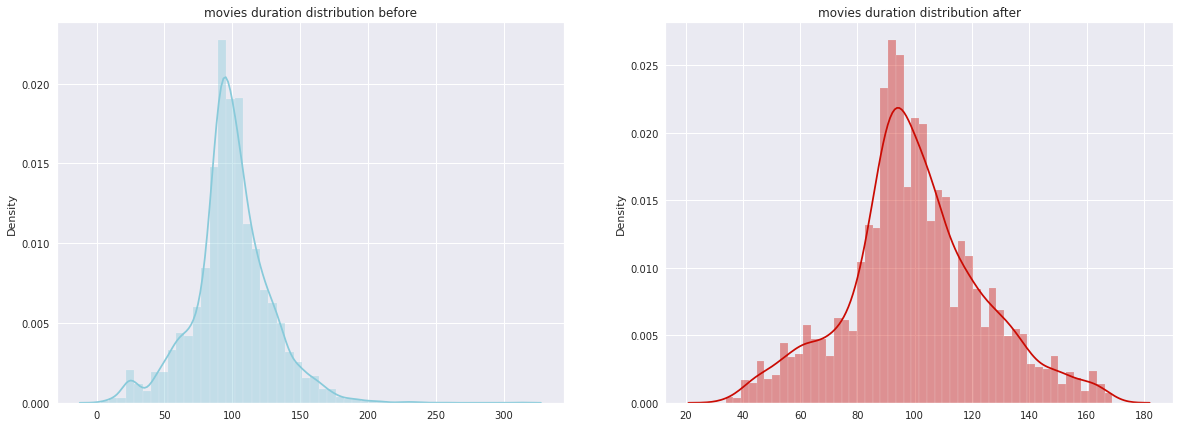

In [46]:
# let's see what changes we have made in the distribution

# first let see distribution of movies again 

plt.figure(figsize = (10,7))

fig, axes  = plt.subplots(1,2, figsize = (20,7))
ax = plt.gca()


sns.distplot( x= movie_df['duration'], color = 'c', bins = 50, ax =axes[0])
axes[0].set_title('movies duration distribution before')

sns.distplot( x= movie_df_updated['duration'], color = 'r', bins = 50, ax =axes[1])
axes[1].set_title('movies duration distribution after')
plt.show()


In [47]:
# cheking shape of movie_df after outlier removal
movie_df_updated.shape

(5163, 12)

In [48]:
# consolidated dataset 
updated_dataset = pd.concat([shows_df_updated, movie_df_updated], axis = 0)
updated_dataset.drop(['title', 'director', 'description'], axis =1 , inplace = True)
updated_dataset.head()

,type,cast,country,release_year,rating,duration,listed_in,month_added,year_added
0,TV Show,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",August,2020
5,TV Show,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",July,2017
11,TV Show,"Robert Więckiewicz, Maciej Musiał, Michalina O...","Poland, United States",2018,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas",November,2018
12,TV Show,not available,Mexico,2019,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...",May,2019
16,TV Show,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...",missing,2018,TV-14,1 Season,"International TV Shows, TV Dramas",March,2019


In [49]:
# creating different columns of genres
genres = updated_dataset['listed_in'].str.split(', ', expand = True)
genres[1].fillna(genres[0], inplace = True)
genres[2].fillna(genres[1], inplace = True)
updated_dataset = pd.concat([updated_dataset, genres], axis = 1).drop('listed_in', axis =1)
updated_dataset.rename(columns = {0 : 'genre1', 1: 'genre2', 2: 'genre3'}, inplace = True)
updated_dataset.head()

,type,cast,country,release_year,rating,duration,month_added,year_added,genre1,genre2,genre3
0,TV Show,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,TV-MA,4 Seasons,August,2020,International TV Shows,TV Dramas,TV Sci-Fi & Fantasy
5,TV Show,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,2016,TV-MA,1 Season,July,2017,International TV Shows,TV Dramas,TV Mysteries
11,TV Show,"Robert Więckiewicz, Maciej Musiał, Michalina O...","Poland, United States",2018,TV-MA,1 Season,November,2018,Crime TV Shows,International TV Shows,TV Dramas
12,TV Show,not available,Mexico,2019,TV-MA,1 Season,May,2019,Crime TV Shows,Docuseries,International TV Shows
16,TV Show,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...",missing,2018,TV-14,1 Season,March,2019,International TV Shows,TV Dramas,TV Dramas


In [50]:
# shape of updated dataset
updated_dataset.shape

(7553, 11)

In [51]:
#Shape of initial dataset
initial_df.shape

(7787, 12)

## Summary: Section4


*   Afer perfoming EDA on the dataset we have get rid of outliers since outliers can lead to bad clustering hence anamolies and outliers must be removed from the dataset.
*   In this way first we have decided the columns where we can perform the outlier detection as most of the features are categorical hence our base of removing outliers will value counts for different categories. Since most of the columns contains large no. of less counted values hence we will have to decide which can be gone through the process of outlier detection. In this scenerio we have decided to perform this on country column and dution column of movies and TV shows. but here we found many points which contains a chain of countries hence the value count is one. by removing these columns we might loose important information and finally we have dropped the idea of removing outlier from this column.
*   Then we have performed outlier removal process on duration column. As the scale of duration for TV shows is different from the duration of movies hence we have done this task in two different ways. first we have removed some shows having very high no. seasons as no. such shows is very less. thus we have removed all shows which have seasons more than 11. while in movies duration we have use islolation forest which is a method to detect an outlier in the dataset. and after applying this method we have visualized the distribution which now changed from positively skewed to somewhat normally distributed.By applying all this we have removed approx 240 data points from our dataset.



## Section 5: Applying NLP to find similar contents
Now will be finding the similar movies based on description similarities. For this we will be using content based filtering 

In [52]:
# creating a copy of movie_df dataset
recom_movies = movie_df.copy()

In [53]:
# looking ar first five movies descriptions
recom_movies['description'].head()

1    After a devastating earthquake hits Mexico Cit...
2    When an army recruit is found dead, his fellow...
3    In a postapocalyptic world, rag-doll robots hi...
4    A brilliant group of students become card-coun...
6    After an awful accident, a couple admitted to ...
Name: description, dtype: object

Now we'll compute Term Frequency-Inverse Document Frequency (TF-IDF) vectors for each overview.

if you are wondering what is term frequency , it is the relative frequency of a word in a document and is given as (term instances/total instances). Inverse Document Frequency is the relative count of documents containing the term is given as log(number of documents/documents with term) The overall importance of each word to the documents in which they appear is equal to TF * IDF

This will give us a matrix where each column represents a word in the overview vocabulary (all the words that appear in at least one document) and each row represents a movie, as before.This is done to reduce the importance of words that occur frequently in plot overviews and therefore, their significance in computing the final similarity score.

Fortunately, scikit-learn gives you a built-in TfIdfVectorizer class that produces the TF-IDF matrix in a couple of lines. That's great, isn't it?

In [54]:
# defining a TfidfVectorizer object and we will be removing all the stop words such as a, an, how etc.


tfidf =  TfidfVectorizer(stop_words = 'english')

# replacing all the null values by an empty string ' '
recom_movies['description'] = recom_movies['description'].fillna('')


# constructing a tfidf matrix by applying by fitting and transforming the data

tfidf_matrix = tfidf.fit_transform(recom_movies['description'])

# let's have a look at the matrix
tfidf_matrix.shape

(5372, 14596)

We see that over 14596 different words were used to describe the 5372 movies in our dataset.

With this matrix in hand, we can now compute a similarity score. There are several candidates for this; such as the euclidean, the Pearson and the cosine similarity scores. There is no right answer to which score is the best. Different scores work well in different scenarios and it is often a good idea to experiment with different metrics.

We will be using the cosine similarity to calculate a numeric quantity that denotes the similarity between two movies. We use the cosine similarity score since it is independent of magnitude and is relatively easy and fast to calculate. Mathematically, it is defined as follows:

             



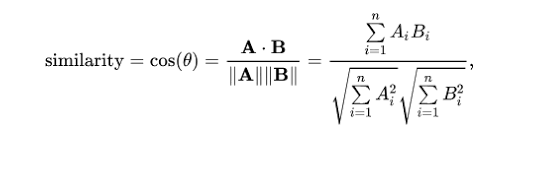

Since we have used the TF-IDF vectorizer, calculating the dot product will directly give us the cosine similarity score. Therefore, we will use sklearn's linear_kernel() instead of cosine_similarities() since it is faster.

also 
We are going to define a function that takes in a movie title as an input and outputs a list of the 10 most similar movies. Firstly, for this, we need a reverse mapping of movie titles and DataFrame indices. In other words, we need a mechanism to identify the index of a movie in our metadata DataFrame, given its title.

In [55]:
# importing cosine_similarity from sklearn.metrics.pairwise 
from sklearn.metrics.pairwise import cosine_similarity

# Compute the cosine similarity matrix
cosine_sim  = cosine_similarity(tfidf_matrix, tfidf_matrix)


#Construct a reverse map of indices and movie titles
indices = pd.Series(recom_movies.index, index=recom_movies['title']).drop_duplicates()

We are now in a good position to define our recommendation function. These are the following steps we'll follow :-

Get the index of the movie given its title.

Get the list of cosine similarity scores for that particular movie with all movies. 

Convert it into a list of tuples where the first element is its position and the second is the similarity score.

Sort the aforementioned list of tuples based on the similarity scores; that is, the second element.

Get the top 10 elements of this list. Ignore the first element as it refers to self (the movie most similar to a particular movie is the movie itself).

Return the titles corresponding to the indices of the top elements.

In [56]:
# Function that takes in movie title as input and outputs most similar movies

def get_recommendations( title, cosine_sim = cosine_sim):


  # getting the index of the movie we are feeding to the function
  idx = indices[title]

  # Get the pairwsie similarity scores of all movies with that movie
  sim_scores = list(enumerate(cosine_sim[idx]))


  # Sort the movies based on the similarity scores
  sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

  # Get the scores of the 10 most similar movies
  sim_scores = sim_scores[1:11]

  # Get the movie indices
  movie_indices = [i[0] for i in sim_scores]

  # Return the top 10 most similar movies
  return recom_movies['title'].iloc[movie_indices]





In [57]:
recom_movies[105:108]

,type,title,director,cast,country,release_year,rating,duration,listed_in,description,month_added,year_added
131,Movie,68 Kill,Trent Haaga,"Matthew Gray Gubler, AnnaLynne McCord, Alisha ...",United States,2017,R,96,"Comedies, Independent Movies, Thrillers",A hapless guy agrees to help his stunning – bu...,September,2019
133,Movie,7 años,Roger Gual,"Paco León, Juana Acosta, Juan Pablo Raba, Alex...",Spain,2016,TV-MA,77,"Dramas, International Movies",Loyalties are tested and cruelties revealed wh...,October,2016
135,Movie,7 Din Mohabbat In,"Meenu Gaur, Farjad Nabi","Mahira Khan, Sheheryar Munawar, Javed Sheikh, ...",Pakistan,2018,TV-PG,137,"Comedies, International Movies, Music & Musicals",Given just seven days by a genie to find a gir...,May,2019


In [58]:
get_recommendations('68 Kill')

808                  Before the Flood
7667               World Trade Center
5675                     Smart People
5030                            Queen
2969             In Search of Fellini
5738                          Sparkle
2341                        Game Over
2847    How to Make an American Quilt
6844                     The Ruthless
5596             Sicilian Ghost Story
Name: title, dtype: object

## we can apply same algorithm for TV shows

In [59]:
recom_shows = shows_df.copy()

In [60]:
recom_shows['description'] = recom_shows['description'].fillna('')


# constructing a tfidf matrix by applying by fitting and transforming the data

tfidf_matrix1 = tfidf.fit_transform(recom_shows['description'])


# let's have a look at the matrix
tfidf_matrix1.shape

(2398, 9550)

In [61]:

# importing cosine_similarity from sklearn.metrics.pairwise 
from sklearn.metrics.pairwise import cosine_similarity


# Compute the cosine similarity matrix
cosine_sim  = cosine_similarity(tfidf_matrix1, tfidf_matrix1)


#Construct a reverse map of indices and movie titles
indices = pd.Series(recom_shows.index, index=recom_shows['title']).drop_duplicates()


In [62]:
def get_recom_shows( title, cosine_sim = cosine_sim):


  # getting the index of the movie we are feeding to the function
  idx = indices[title]

  # Get the pairwsie similarity scores of all movies with that movie
  sim_scores = list(enumerate(cosine_sim[idx]))


  # Sort the movies based on the similarity scores
  sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

  # Get the scores of the 10 most similar movies
  sim_scores = sim_scores[1:11]

  # Get the movie indices
  show_indices = [i[0] for i in sim_scores]

  # Return the top 10 most similar movies
  return recom_shows['title'].iloc[show_indices]

In [63]:
get_recom_shows('1994')

5130                             Record of Youth
5119                            Reality of Dream
4170                                  Momo Salon
1924                                        Edha
4325                              My Hotter Half
7402                            Velvet Colección
2771    Holiday Home Makeover with Mr. Christmas
2958                                   Imposters
2441                                     Glow Up
2427                                 Girlfriends
Name: title, dtype: object

## Summary: Section 5

In this section we have developed an NLP algorithm that can give us similar content. however, based on the nature of the content like movie/ TV show we have developed two funtion so that we can get similar movies for a given and TV shows for a given TV show. To achive this we have used TF-IDF vectorizer and cosine similarity. the details of both these are given above when we used them.


In this section we will be performing Clustering over the cleaned dataset i.e updated_dataset as we already have gone thorugh our data and seen that the data contains a lot of categorigal features and hence we will be using Kmodes clustering method  as this method is the most suitable available method for clustering for categorical data. Also we know that most of the algorithms can not be applied on the dataset that has categorical features as they do not yield good resluts and  and will will be applying require some transformations from categorical features to numerical features. Although this task can be performed manually with help of encoding and PCA( principal component analysis) but we also have well defined algorithm to perform the same transformation named `UMAP', MCA [ ( Uniform Manifold Approximation and Projection), (multiple correspondense analysis ) ]  which comes under Prince library.

The steps that are involved in this section will be as follows:

1 - Apply K-modes clustering on categorical data and find out the best value of K using albow method

2 - Apply MCA and get the intuition wheather this is a write choice plotting it in two dimensions.

3 - implimenting UMAP and converting it to a dataframe.

4 - implimenting Clustering models on transformed data say X and find out best no. of clusters. in this process we will be using a couple of clustering model- 
  a) DBSCAN

  b) Hierarchical 

  c) Spectral clustering 

  d) K means and validation using Silhouette score



### Uniform Manifold Approximation and Projection for Dimension Reduction (UMAP)

UMAP is a dimensionality reduction technique predicated upon manifold learning & ideas from topological data analysis. It provides a general framework for applying dimensionality reduction and is an incredibly powerful tool in any data scientist’s arsenal. In order to apply UMAP to mixed data we must create two separate manifolds one for each data type, as UMAP still needs to compute distances between points. These two manifolds are then combined either by computing the Union which preserves the categorical embedding more, or by calculating the intersection which will cause the embedding to more closely resemble the numerical manifold.

## Section 6:  Clustering 

## Kmodes

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 61938.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 61938.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 61938.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 61938.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 61938.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 825, cost: 57352.0
Run 1, iteration: 2/100, moves: 220, cost: 57352.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 789, cost: 57781.0
Init: initializing c

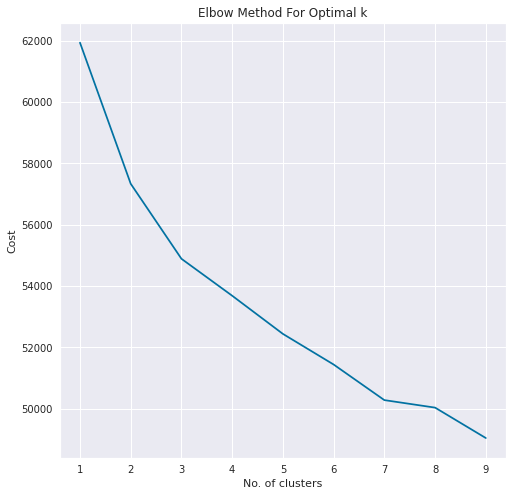

In [64]:
# Elbow curve to find optimal K value
cost = []
K = range(1,10)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1, random_state= 101)
    y_kmodes = kmode.fit_predict(updated_dataset)
    cost.append(kmode.cost_)

plt.figure(figsize = (8,8))    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [65]:
# Building the model with 3 clusters
kmode = KModes(n_clusters=3, init = "random", n_init = 4, verbose=1, random_state = 42)
clusters = kmode.fit_predict(updated_dataset)
clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1129, cost: 57507.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 1157, cost: 55486.0
Run 2, iteration: 2/100, moves: 142, cost: 55486.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 1592, cost: 57032.0
Run 3, iteration: 2/100, moves: 545, cost: 57032.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 1526, cost: 55669.0
Run 4, iteration: 2/100, moves: 712, cost: 55336.0
Run 4, iteration: 3/100, moves: 446, cost: 55336.0
Best run was number 4


array([2, 2, 2, ..., 0, 0, 0], dtype=uint16)

In [66]:
# adding a column into dataset having assigned cluster 
cluster_df = updated_dataset.copy()

cluster_df['cluster_assigned'] = clusters
cluster_df

,type,cast,country,release_year,rating,duration,month_added,year_added,genre1,genre2,genre3,cluster_assigned
0,TV Show,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,TV-MA,4 Seasons,August,2020,International TV Shows,TV Dramas,TV Sci-Fi & Fantasy,2
5,TV Show,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,2016,TV-MA,1 Season,July,2017,International TV Shows,TV Dramas,TV Mysteries,2
11,TV Show,"Robert Więckiewicz, Maciej Musiał, Michalina O...","Poland, United States",2018,TV-MA,1 Season,November,2018,Crime TV Shows,International TV Shows,TV Dramas,2
12,TV Show,not available,Mexico,2019,TV-MA,1 Season,May,2019,Crime TV Shows,Docuseries,International TV Shows,2
16,TV Show,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...",missing,2018,TV-14,1 Season,March,2019,International TV Shows,TV Dramas,TV Dramas,2
...,...,...,...,...,...,...,...,...,...,...,...,...
7781,Movie,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2006,PG,88,January,2020,Children & Family Movies,Comedies,Comedies,0
7782,Movie,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...",2005,TV-MA,99,October,2020,Dramas,International Movies,International Movies,0
7783,Movie,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2015,TV-14,111,March,2019,Dramas,International Movies,Music & Musicals,0
7784,Movie,Nasty C,missing,2019,TV-MA,44,September,2020,Documentaries,International Movies,Music & Musicals,0


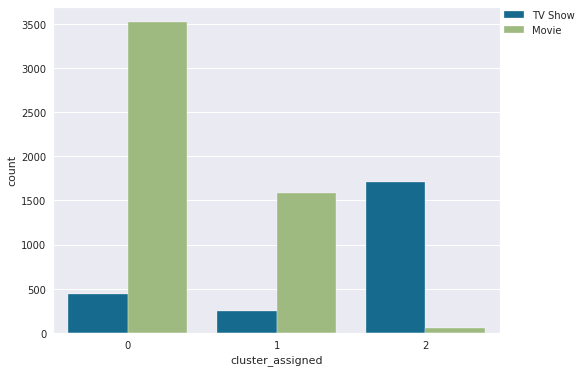

In [67]:
# count plot for cluster
plt.figure(figsize = (8,6))
sns.countplot(data = cluster_df , x= 'cluster_assigned', hue = 'type' )
plt.legend(loc = (1.0, 0.9))
plt.show()




In [68]:
# taking a look on the head of the data
updated_dataset.head()

,type,cast,country,release_year,rating,duration,month_added,year_added,genre1,genre2,genre3
0,TV Show,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,TV-MA,4 Seasons,August,2020,International TV Shows,TV Dramas,TV Sci-Fi & Fantasy
5,TV Show,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,2016,TV-MA,1 Season,July,2017,International TV Shows,TV Dramas,TV Mysteries
11,TV Show,"Robert Więckiewicz, Maciej Musiał, Michalina O...","Poland, United States",2018,TV-MA,1 Season,November,2018,Crime TV Shows,International TV Shows,TV Dramas
12,TV Show,not available,Mexico,2019,TV-MA,1 Season,May,2019,Crime TV Shows,Docuseries,International TV Shows
16,TV Show,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...",missing,2018,TV-14,1 Season,March,2019,International TV Shows,TV Dramas,TV Dramas


In [69]:
 # checking for the datatype
updated_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7553 entries, 0 to 7786
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          7553 non-null   object
 1   cast          7553 non-null   object
 2   country       7553 non-null   object
 3   release_year  7553 non-null   object
 4   rating        7553 non-null   object
 5   duration      7553 non-null   object
 6   month_added   7553 non-null   object
 7   year_added    7553 non-null   object
 8   genre1        7553 non-null   object
 9   genre2        7553 non-null   object
 10  genre3        7553 non-null   object
dtypes: object(11)
memory usage: 966.1+ KB


Before proceeding with UMAP we do have one more API to convert purely categorical data into numerical data name as MCA (multiple correspondece analysis which also come from Prince library )

In [70]:
# importing and implimenting MCA
import prince

mca = prince.MCA(n_components=3, n_iter=10,copy=True,  check_input=True,  engine='sklearn',  random_state=42)


mca.fit(updated_dataset)



MCA(engine='sklearn', n_components=3, random_state=42)

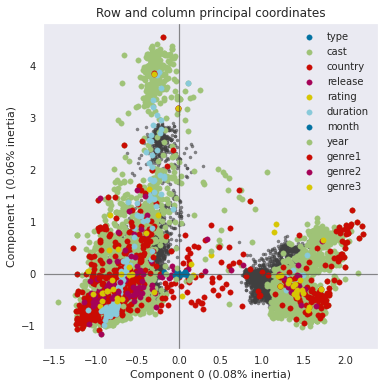

In [71]:
# plotting the results of MCA

ax = mca.plot_coordinates(X=updated_dataset,ax=None,figsize=(6, 6),show_row_points=True,row_points_size=10,show_row_labels=False,
     show_column_points=True,column_points_size=30,    show_column_labels=False, legend_n_cols=1)

plt.show()

When we have plotted the results of MCA we found that components are giving good results as the metric inertia is directly related to the variance explained by component. we can have a look on the data that PCA1 (component 0) is explaining 0.08% and (component 1) is explaining 0.06% which obviously is not a good result hence we will not be using this embedding for our results.

## Implimenting UMAP on updated_dataset

In [72]:
# Implimenting UMAP on updated_dataset
def one_hot_encode(df, columns):
  '''
  one hot encodes list of columns and
  concatenates them to the original df
  '''

  concat_df = pd.concat([pd.get_dummies(df[col], drop_first=True, prefix=col) for col in columns], axis=1)
  one_hot_cols = concat_df.columns

  return concat_df, one_hot_cols
  

cat_cols = updated_dataset.select_dtypes(include='object')
df_one_hot, _ = one_hot_encode(updated_dataset, cat_cols)

umap_embedding = (umap.UMAP(metric='euclidean', n_neighbors=200, n_components=10, random_state = 101, ).fit_transform(df_one_hot))

In [73]:
# creating a dataframe
umap_embedding
umap_df = pd.DataFrame(umap_embedding)




dataSet_1 = StandardScaler().fit_transform(umap_df)
X=normalize(dataSet_1)
X

array([[-0.3816618 ,  0.30482805, -0.3172885 , ..., -0.37526217,
        -0.34622598, -0.11184184],
       [-0.40478194,  0.20933126, -0.4194148 , ..., -0.34239328,
        -0.3192795 , -0.12858768],
       [-0.3043268 ,  0.22896947, -0.37063122, ..., -0.2882429 ,
        -0.27760756, -0.40613967],
       ...,
       [ 0.28731883, -0.02308634,  0.3282196 , ...,  0.3702598 ,
         0.37708175,  0.22481737],
       [ 0.34674782, -0.04161623,  0.24782752, ...,  0.3107204 ,
         0.2734976 ,  0.40693262],
       [ 0.43236184, -0.16355875, -0.0477016 , ...,  0.4297176 ,
         0.07396641,  0.31472737]], dtype=float32)

## Applying DBSCAN on newly transformed data

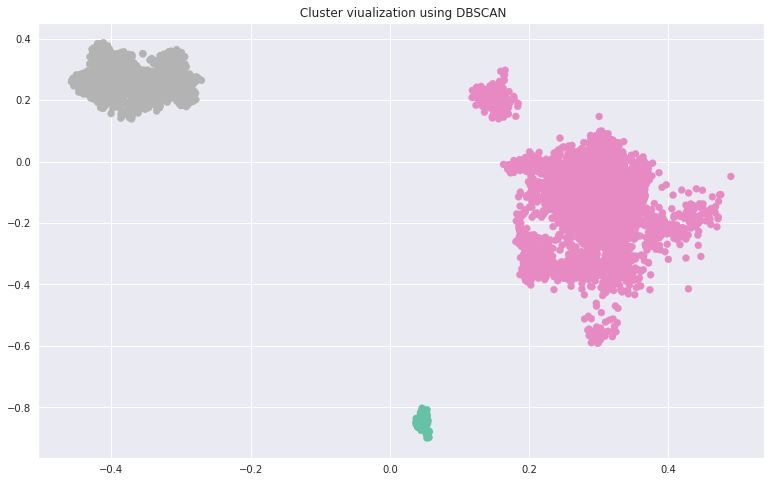

In [74]:
# implimenting DBSCAN
from sklearn.cluster import DBSCAN
from sklearn import metrics
y_pred = DBSCAN(eps=0.5, min_samples=5, algorithm ='auto', leaf_size = 25, ).fit_predict(X)
plt.figure(figsize=(13,8))
plt.scatter(X[:,0], X[:,1], c=y_pred, cmap = 'Set2_r')
plt.title(' Cluster viualization using DBSCAN')
plt.show()

## Applying Hierarchical Clustering on transformed data

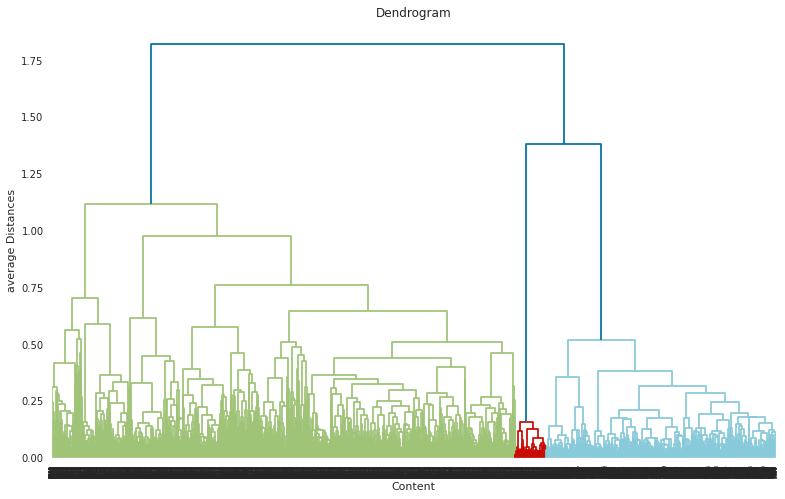

In [75]:
# Using the dendogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(13,8))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'average'))
plt.title('Dendrogram')
plt.xlabel('Content')
plt.ylabel('average Distances')
plt.show() # find largest vertical distance we can make without crossing any other horizontal line

In [76]:
# Fitting hierarchical clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
# X =X.values
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'average')
y_hc = hc.fit_predict(X)

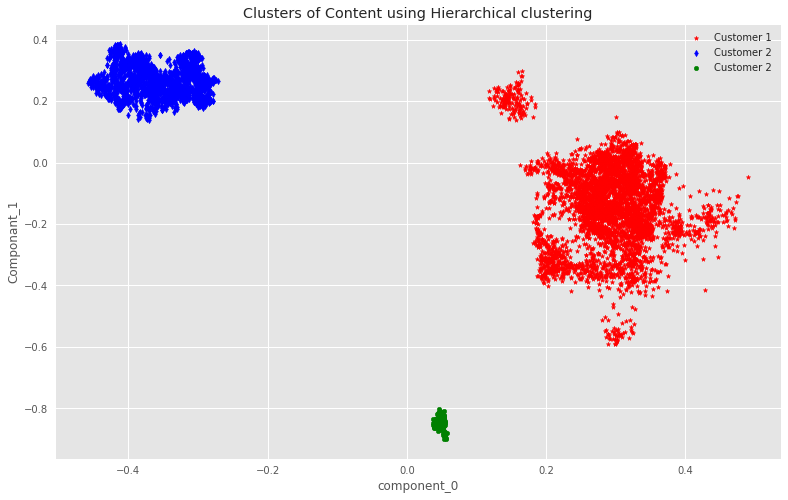

In [79]:
# X = X.values
# Visualizing the clusters (two dimensions only)
plt.figure(figsize=(13,8))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 20, c = 'red', label = 'Customer 1', marker = '*')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 20, c = 'blue', label = 'Customer 2', marker  = 'd')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 20, c = 'green', label = 'Customer 2')


plt.title('Clusters of Content using Hierarchical clustering')
plt.xlabel('component_0')

plt.ylabel('Componant_1')
plt.legend()
plt.show()

## Applying SpectralClustering on transformed data

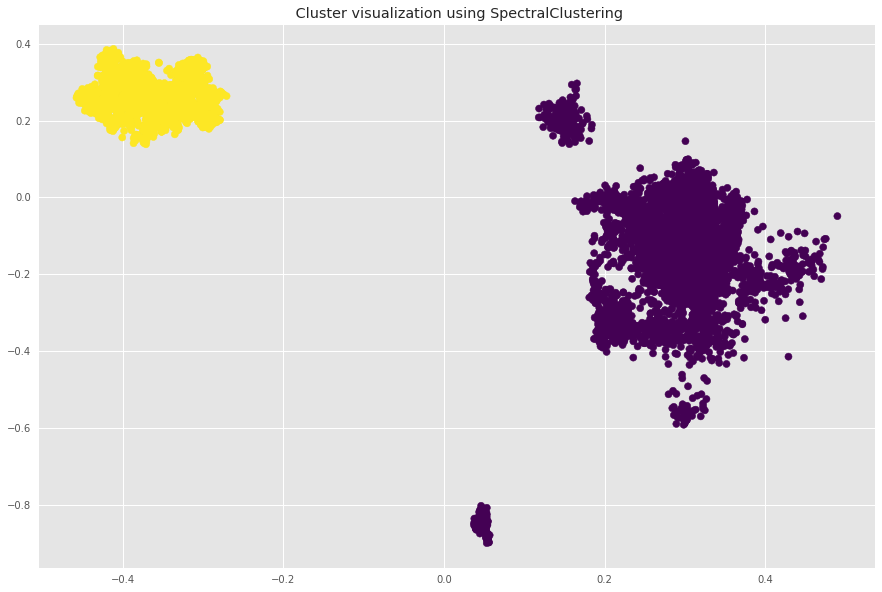

In [78]:
# fitting SpectralClustering using 'rbf' kernel
# X = X.values
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='rbf',
                           assign_labels='kmeans', random_state =42)
labels = model.fit_predict(X)

plt.style.use('ggplot')
plt.figure(figsize = (15,10))
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis')
plt.title(' Cluster visualization using SpectralClustering')
plt.show()

In [80]:
#  defining a function for Silhouette scoring and visualization
from sklearn.metrics import silhouette_score, silhouette_samples

def silhouette_score_analysis(n):

  for n_clusters in range(2,n):
      km = KMeans(n_clusters=n_clusters, random_state = 42, max_iter = 100 )
      preds = km.fit_predict(X)
      centers = km.cluster_centers_

      score = silhouette_score(X, preds, metric='euclidean')
      print ("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

      visualizer = SilhouetteVisualizer(km)

      visualizer.fit(X) # Fit the training data to the visualizer
      visualizer.poof() # Draw/show/poof the data


For n_clusters = 2, silhouette score is 0.6014919281005859


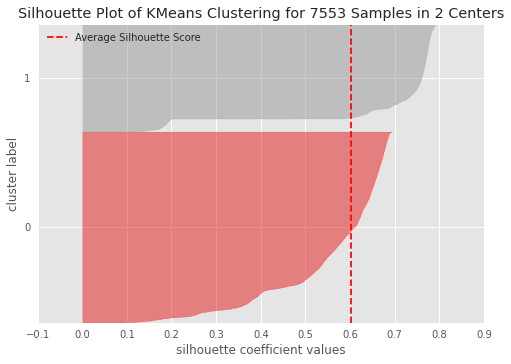

For n_clusters = 3, silhouette score is 0.5002426505088806


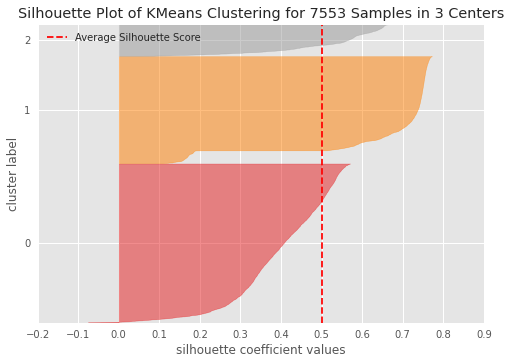

For n_clusters = 4, silhouette score is 0.5387254953384399


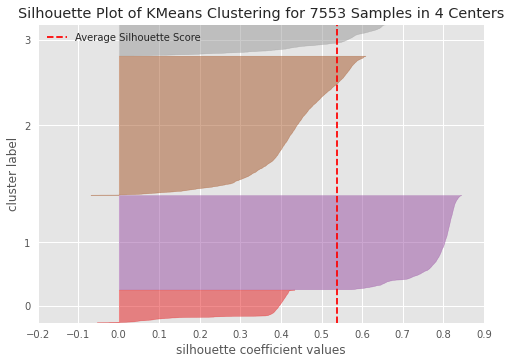

For n_clusters = 5, silhouette score is 0.5442843437194824


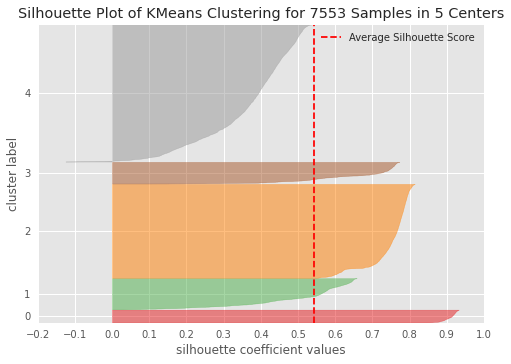

For n_clusters = 6, silhouette score is 0.5323868989944458


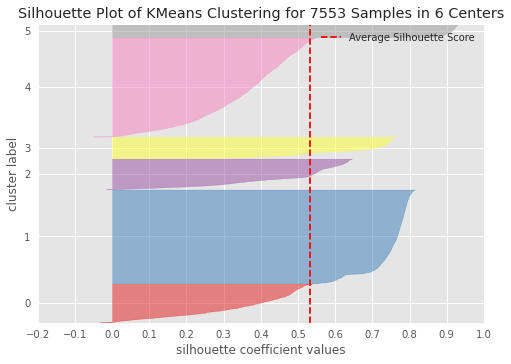

For n_clusters = 7, silhouette score is 0.4998006224632263


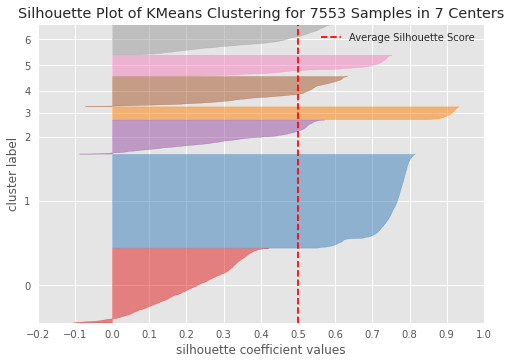

For n_clusters = 8, silhouette score is 0.43235141038894653


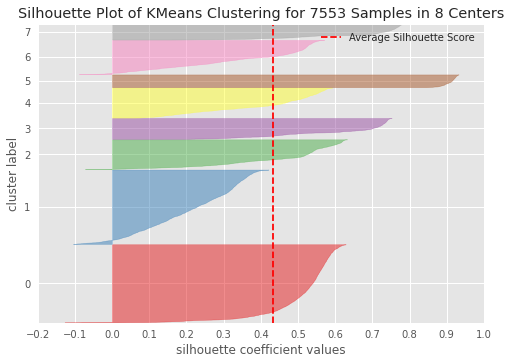

For n_clusters = 9, silhouette score is 0.4307063817977905


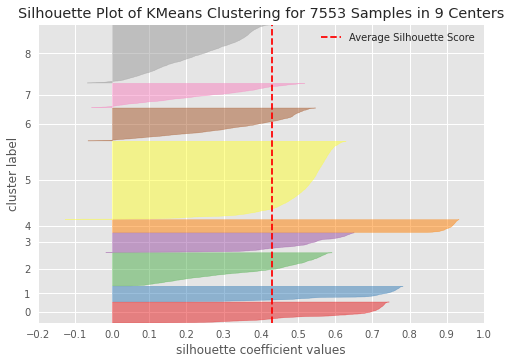

In [81]:
silhouette_score_analysis(10)

In [82]:
from prettytable import PrettyTable 
  
# Specify the Column Names while initializing the Table 
myTable = PrettyTable(['SL No.',"Model_Name",'Data', "Optimal_Number_of_cluster"]) 
  
# Add rows 
myTable.add_row(['1',"K-Modes with Elbow method", "categorical", "3"]) 
myTable.add_row(['2',"DBSCAN ", "Transformed(numeric)", "3"]) 
myTable.add_row(['3',"Hierachical ", "Transformed(numeric)", "2"]) 
myTable.add_row(['4',"Spectral Clustering  ", "Transformed(numeric)", "2"])
myTable.add_row(['5',"K-Means with Silhouette score", "Transformed(numeric)", "2"])

print(myTable)

+--------+-------------------------------+----------------------+---------------------------+
| SL No. |           Model_Name          |         Data         | Optimal_Number_of_cluster |
+--------+-------------------------------+----------------------+---------------------------+
|   1    |   K-Modes with Elbow method   |     categorical      |             3             |
|   2    |            DBSCAN             | Transformed(numeric) |             3             |
|   3    |          Hierachical          | Transformed(numeric) |             2             |
|   4    |     Spectral Clustering       | Transformed(numeric) |             2             |
|   5    | K-Means with Silhouette score | Transformed(numeric) |             2             |
+--------+-------------------------------+----------------------+---------------------------+


## Conclusions:
### from above results we have seen that most of the clustering methods are recommending   2 cluster hence we can conclude that our data is best defined in 2 clusters also we have verified this using multiple models and methods which are available for clustering velidation (Silhouette Score and elblow method)

# Final Summary

This project was divided into 7 sections where each section.

Section 1: In this section we have simply loaded our dataset into google colab and explored the basic information about data.

Section 2: In section 2 we have dealt with missing values and imputed the missing values depending on the certain assumption so that we do not miss out important information of the data.

Section 3: In this section We have foused on the EDA part where we have performed a detailed EDA on all the possible columns we have drawn a lot of insights even though the data in some columns was not in appropriate format such as cast, listed_in etc.

Section 4: in this section we have dealt with outliers where we have used general way remove categorical outliers and then we have used isolation forest to remove numeric outliers and visualise out data before and after the process.

Section 5: In this section we have performed NLP to find out which are the top 10 similar movies and TV shows 

Section 6: In this section we have perform various clustering methods to find out best no. of clusters and for validation we have used Silhouette score and elbow curve where ever it is applicable.

finally we have reached to the conclusion that the optimal no. of clusters that can be formed using the given data is 3

**Our Findings :-**
•	The ratio of TV shows vs Movies is 31: 69 , thus the total number of movies is more than double of number of TV shows & web series ..,

•	Most of the Tv shows/web series have max 3 seasons , this refers that the forthcoming Tv shows can be introduced in similar 2-3 series max else it loses its TRP  (viewership).

•	The Movie’s duration is 90 min – 110 mins of most movies , which can be inferred that people are comfortable watching movies within this time duration .

•	Maximum number of Movies as well as TV shows are Rated under TV-MA category and then followed by TV-14 .

•	There is a trend that most of the movies and TV shows are added during October to January months of the year .

•	The number of movies and TV shows added has constantly risen from 2015 to 2019 but we have found out  that more number of movies were added during this tenure as compared to TV shows but between 2019- 2020 yes there has been more TV shows added than Movies .
•	 Then we have tabulate top 15 countries which has released most movies and TV shows and found that US is on top in both. In shows US is followed by UK and in movies US is followed by India.
•	We also have actors who were part of most shows and movies which gave us that Takahiro sukurai has worked in most shows and Anupam kher has worked in most movies.

•	We also found out that Genre wise International movies & Tv shows are most in numbers followed by Drama & Comedy categories and this order is same for Movies and Tv shows.

•	Also Using NLP  we have found out top 10 recommended movies and Tv shows by implementing Cosine similarity  which has most similarity with the other content present on Netflix , using this features the suggested TV shows and Movies can be recommended to a particular user based upon his past preferences .

•	Also Using NLP  we have found out top 10 recommended movies and Tv shows by implementing Cosine similarity  which has most similarity with the other content present on Netflix , using this features the suggested TV shows and Movies can be recommended to a particular user based upon his past preferences . .







**Results of different clustering Algorithms  :-**
•	Using K –Modes ,in elbow plot we can clearly see that the elbow is formed at 3 , so the number of clusters formed as per K-Modes is 3 .

•	Using DB Scan ,As shown by the color codes of the DB Scan graph, it can be seen that the algorithm is clustering the data into 3 main clusters ..,

•	Using Agglomerative hierarchical clustering ,  In our case we got 2 vertical lines, which symbolizes that the given data can be best divided into 2 clusters ..,

•	Using Spectral Clustering we got 2 clusters .

•	Using K-Means Clustering Silhouette score closest to 1 is considered as best and its respective value shown the optimal no. of clusters for the given dataset data.., Here 2 No. of clusters are optimal number of clusters because its respective silhouette score 0.6 was the highest amongst all ..,

•	Spectral Clustering 
•	K –Modes
•	DB Scan
•	K- Means
•	Hierarchical agglomerative 


**Conclusion :-**
For NetFlix Movies  , International Movies with genres as Drama ,Comedy &  thriller etc. having duration of 90-110 mins are the most preferred ones , and are the safe bet for good viewership and for attracting more new subscriptions.., also people like to watch actors like Anupam Kher , Shahrukh Khan , Akshay Kumar , Kareena Kapoor , Boman Irani , Paresh Rawal etc.
For NetFlix TV shows , we recommend to introduce  international  TV shows , followed by Drama , Comedy and Crime related series  between October to January period with actors like Takahiro Sakurai , Junichi Suwabe , Yuki Kaji etc , this would be safe & profitable bet as there will be more chance of the show getting hit .,
As far as Clustering is concerned of the given dataset ,Some algorithms are forming 3 clusters and majority of them 2 ,so we can conclude as the total clusters formed on our dataset in most of the cases is between 2 clusters .



Thank you 